### this time using a Convolutional Neural Network that's better suited for image processing. 

In [3]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

In [4]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [5]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# to transform that number between 0 and 1
train_images /= 255
test_images /= 255

In [6]:
#we need to convert our train and test labels to be categorical in one-hot format:
train_labels = tensorflow.keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = tensorflow.keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


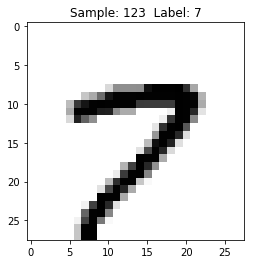

In [9]:
#print out one of the training images with its label:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(123)

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), # our convolution new layer going to have 32 windows
                 activation='relu',
                 input_shape=input_shape))
# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
#don't run, takes hours times to see result
history = model.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 1101s - loss: 0.1888 - acc: 0.9432 - val_loss: 0.0455 - val_acc: 0.9848
Epoch 2/10
 - 1108s - loss: 0.0766 - acc: 0.9766 - val_loss: 0.0348 - val_acc: 0.9888
Epoch 3/10
 - 1073s - loss: 0.0598 - acc: 0.9818 - val_loss: 0.0319 - val_acc: 0.9890
Epoch 4/10
 - 1061s - loss: 0.0492 - acc: 0.9850 - val_loss: 0.0287 - val_acc: 0.9903
Epoch 5/10
 - 1054s - loss: 0.0423 - acc: 0.9867 - val_loss: 0.0287 - val_acc: 0.9907
Epoch 6/10
 - 1043s - loss: 0.0342 - acc: 0.9894 - val_loss: 0.0263 - val_acc: 0.9916
Epoch 7/10
 - 1041s - loss: 0.0320 - acc: 0.9898 - val_loss: 0.0280 - val_acc: 0.9921
Epoch 8/10
 - 10985s - loss: 0.0288 - acc: 0.9908 - val_loss: 0.0288 - val_acc: 0.9916
Epoch 9/10
 - 1068s - loss: 0.0263 - acc: 0.9916 - val_loss: 0.0242 - val_acc: 0.9931
Epoch 10/10
 - 1098s - loss: 0.0246 - acc: 0.9919 - val_loss: 0.0294 - val_acc: 0.9922


# If you're building something where life and death are on the line, like a self-driving car, every fraction of a percent matters.

In [14]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029371827532436418
Test accuracy: 0.9922
